## PLS MODEL

In [1]:
from sys import stdout
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # Imorting Seaborn library, statistical visualizations

from scipy.signal import savgol_filter

from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import scale 

In [2]:
data = pd.read_csv("Volumetric_features.csv") # Read data from .csv file

In [3]:
data.head() # Print the head of the data .csv

S.No  Left-Lateral-Ventricle  Left-Inf-Lat-Vent  \
0     1                 22916.9              982.7   
1     2                 22953.2              984.5   
2     3                 23320.4             1062.1   
3     4                 24360.0             1000.5   
4     5                 25769.4             1124.4   

   Left-Cerebellum-White-Matter  Left-Cerebellum-Cortex  Left-Thalamus  \
0                       15196.7                 55796.4         6855.5   
1                       15289.7                 55778.6         6835.1   
2                       15382.1                 55551.2         7566.0   
3                       14805.4                 54041.8         8004.6   
4                       16331.1                 54108.6         6677.4   

   Left-Caudate  Left-Putamen  Left-Pallidum  3rd-Ventricle  ...  \
0        2956.4        4240.7         2223.9         2034.4  ...   
1        3064.2        4498.6         2354.1         1927.1  ...   
2        3231.7        4456.2         1995.4         2064.7  ...   
3        3137.3        4262.2         1983.4         2017.7  ...   
4        2964.4        4204.6         2409.7         2251.8  ...   

   rh_supramarginal_thickness  rh_frontalpole_thickness  \
0                       2.408                     2.629   
1                       2.417                     2.640   
2                       2.374                     2.601   
3                       2.366                     2.639   
4                       2.381                     2.555   

   rh_temporalpole_thickness  rh_transversetemporal_thickness  \
0                      3.519                            2.009   
1                      3.488                            2.111   
2                      3.342                            2.146   
3                      3.361                            2.056   
4                      3.450                            2.052   

   rh_insula_thickness  rh_MeanThickness_thickness  BrainSegVolNotVent.2  \
0                2.825                     2.33635               1093846   
1                2.720                     2.34202               1099876   
2                2.684                     2.31982               1097999   
3                2.700                     2.29215               1070117   
4                2.574                     2.30397               1075926   

        eTIV.1  Age  dataset  
0  1619602.965   85        1  
1  1624755.130   85        1  
2  1622609.518   86        1  
3  1583854.236   87        1  
4  1617375.362   89        1  

[5 rows x 141 columns]

In [4]:
data.describe() # Returns interesting stats about columns; count, mean, std, min, quartiles

S.No  Left-Lateral-Ventricle  Left-Inf-Lat-Vent  \
count  4226.000000             4226.000000        4226.000000   
mean   2113.500000            13370.040795         574.849716   
std    1220.085448             9194.928348         594.590387   
min       1.000000             2204.100000           0.000000   
25%    1057.250000             7031.625000         243.200000   
50%    2113.500000            10669.950000         385.800000   
75%    3169.750000            17332.650000         720.825000   
max    4226.000000            79812.500000        7533.800000   

       Left-Cerebellum-White-Matter  Left-Cerebellum-Cortex  Left-Thalamus  \
count                   4226.000000             4226.000000    4226.000000   
mean                   14646.696711            52002.811571    7164.947539   
std                     2622.868798             6378.435917    1207.229615   
min                     6920.100000            29911.800000    4145.400000   
25%                    12909.875000            47359.675000    6239.425000   
50%                    14277.000000            51333.650000    7032.150000   
75%                    15959.725000            56287.775000    7977.400000   
max                    35042.500000            79948.200000   13008.300000   

       Left-Caudate  Left-Putamen  Left-Pallidum  3rd-Ventricle  ...  \
count   4226.000000   4226.000000    4226.000000    4226.000000  ...   
mean    3337.653526   4505.158755    1958.214458    1418.947373  ...   
std      502.352001    713.658580     287.139826     635.143286  ...   
min     1035.600000   2294.000000     851.900000      39.700000  ...   
25%     2984.500000   4008.125000    1764.700000     941.825000  ...   
50%     3294.050000   4438.100000    1940.100000    1225.450000  ...   
75%     3655.125000   4963.025000    2128.000000    1780.225000  ...   
max     6018.000000   8446.100000    4357.700000    4461.600000  ...   

       rh_supramarginal_thickness  rh_frontalpole_thickness  \
count                 4226.000000               4226.000000   
mean                     2.429779                  2.684327   
std                      0.185543                  0.275245   
min                      1.345000                  1.655000   
25%                      2.309000                  2.510000   
50%                      2.440500                  2.685000   
75%                      2.562750                  2.851000   
max                      2.996000                  3.928000   

       rh_temporalpole_thickness  rh_transversetemporal_thickness  \
count                4226.000000                      4226.000000   
mean                    3.555803                         2.288283   
std                     0.332094                         0.269851   
min                     1.940000                         1.176000   
25%                     3.360000                         2.105000   
50%                     3.586500                         2.297000   
75%                     3.790000                         2.476000   
max                     4.487000                         3.123000   

       rh_insula_thickness  rh_MeanThickness_thickness  BrainSegVolNotVent.2  \
count          4226.000000                 4226.000000          4.226000e+03   
mean              2.846123                    2.372266          1.085468e+06   
std               0.195038                    0.146944          1.248881e+05   
min               1.533000                    1.483290          6.279600e+05   
25%               2.720000                    2.274935          9.957585e+05   
50%               2.851000                    2.383375          1.075919e+06   
75%               2.975000                    2.483142          1.168888e+06   
max               3.482000                    2.803730          1.545129e+06   

             eTIV.1          Age      dataset  
count  4.226000e+03  4226.000000  4226.000000  
mean   1.514925e+06    58.374586     4.533838  
std    1.651798e+05  

In [5]:
data.corr() # Non-categorical predictor correlations

S.No  Left-Lateral-Ventricle  \
S.No                          1.000000               -0.273051   
Left-Lateral-Ventricle       -0.273051                1.000000   
Left-Inf-Lat-Vent            -0.297935                0.758895   
Left-Cerebellum-White-Matter  0.108163               -0.185344   
Left-Cerebellum-Cortex        0.228461               -0.115200   
...                                ...                     ...   
rh_MeanThickness_thickness    0.551083               -0.473704   
BrainSegVolNotVent.2          0.241622               -0.143671   
eTIV.1                       -0.012108                0.311918   
Age                          -0.448086                0.569539   
dataset                       0.966876               -0.269706   

                              Left-Inf-Lat-Vent  Left-Cerebellum-White-Matter  \
S.No                                  -0.297935                      0.108163   
Left-Lateral-Ventricle                 0.758895                     -0.185344   
Left-Inf-Lat-Vent                      1.000000                     -0.185624   
Left-Cerebellum-White-Matter          -0.185624                      1.000000   
Left-Cerebellum-Cortex                -0.114728                      0.453275   
...                                         ...                           ...   
rh_MeanThickness_thickness            -0.460625                      0.228483   
BrainSegVolNotVent.2                  -0.178073                      0.573532   
eTIV.1                                 0.171763                      0.389334   
Age                                    0.496304                     -0.334077   
dataset                               -0.289179                      0.114491   

                              Left-Cerebellum-Cortex  Left-Thalamus  \
S.No                                        0.228461       0.355100   
Left-Lateral-Ventricle                     -0.115200      -0.339383   
Left-Inf-Lat-Vent                          -0.114728      -0.324770   
Left-Cerebellum-White-Matter                0.453275       0.552485   
Left-Cerebellum-Cortex                      1.000000       0.614980   
...                                              ...            ...   
rh_MeanThickness_thickness                  0.383172       0.520636   
BrainSegVolNotVent.2                        0.738842       0.779632   
eTIV.1                                      0.584460       0.478718   
Age                                        -0.471327      -0.696598   
dataset                                     0.209924       0.355051   

                              Left-Caudate  Left-Putamen  Left-Pallidum  \
S.No                              0.218686      0.343462       0.213620   
Left-Lateral-Ventricle            0.033166     -0.297033      -0.042405   
Left-Inf-Lat-Vent                -0.000890     -0.270332      -0.100457   
Left-Cerebellum-White-Matter      0.232840      0.363488       0.470753   
Left-Cerebellum-Cortex            0.406568      0.481604       0.453184   
...                                    ...           ...            ...   
rh_MeanThickness_thickness        0.329966      0.496941       0.241270   
BrainSegVolNotVent.2              0.511158      0.671049       0.646115   
eTIV.1                            0.445154      0.408873       0.541690   
Age                              -0.316839     -0.596201      -0.283967   
dataset                           0.205266      0.341155       0.227400   

                              3rd-Ventricle  ...  rh_supramarginal_thickness  \
S.No                              -0.323219  ...                    0.482818   
Left-Lateral-Ventricle             0.758326  ...                   -0.450547   
Left-Inf-Lat-Vent                  0.639533  ...                   -0.432036   
Left-Cerebellum-White-Matter      -0.195800  ...                    0.228181   
Left-Cerebellum-Cortex            -0.131148  ...                    0.367147   
...                               

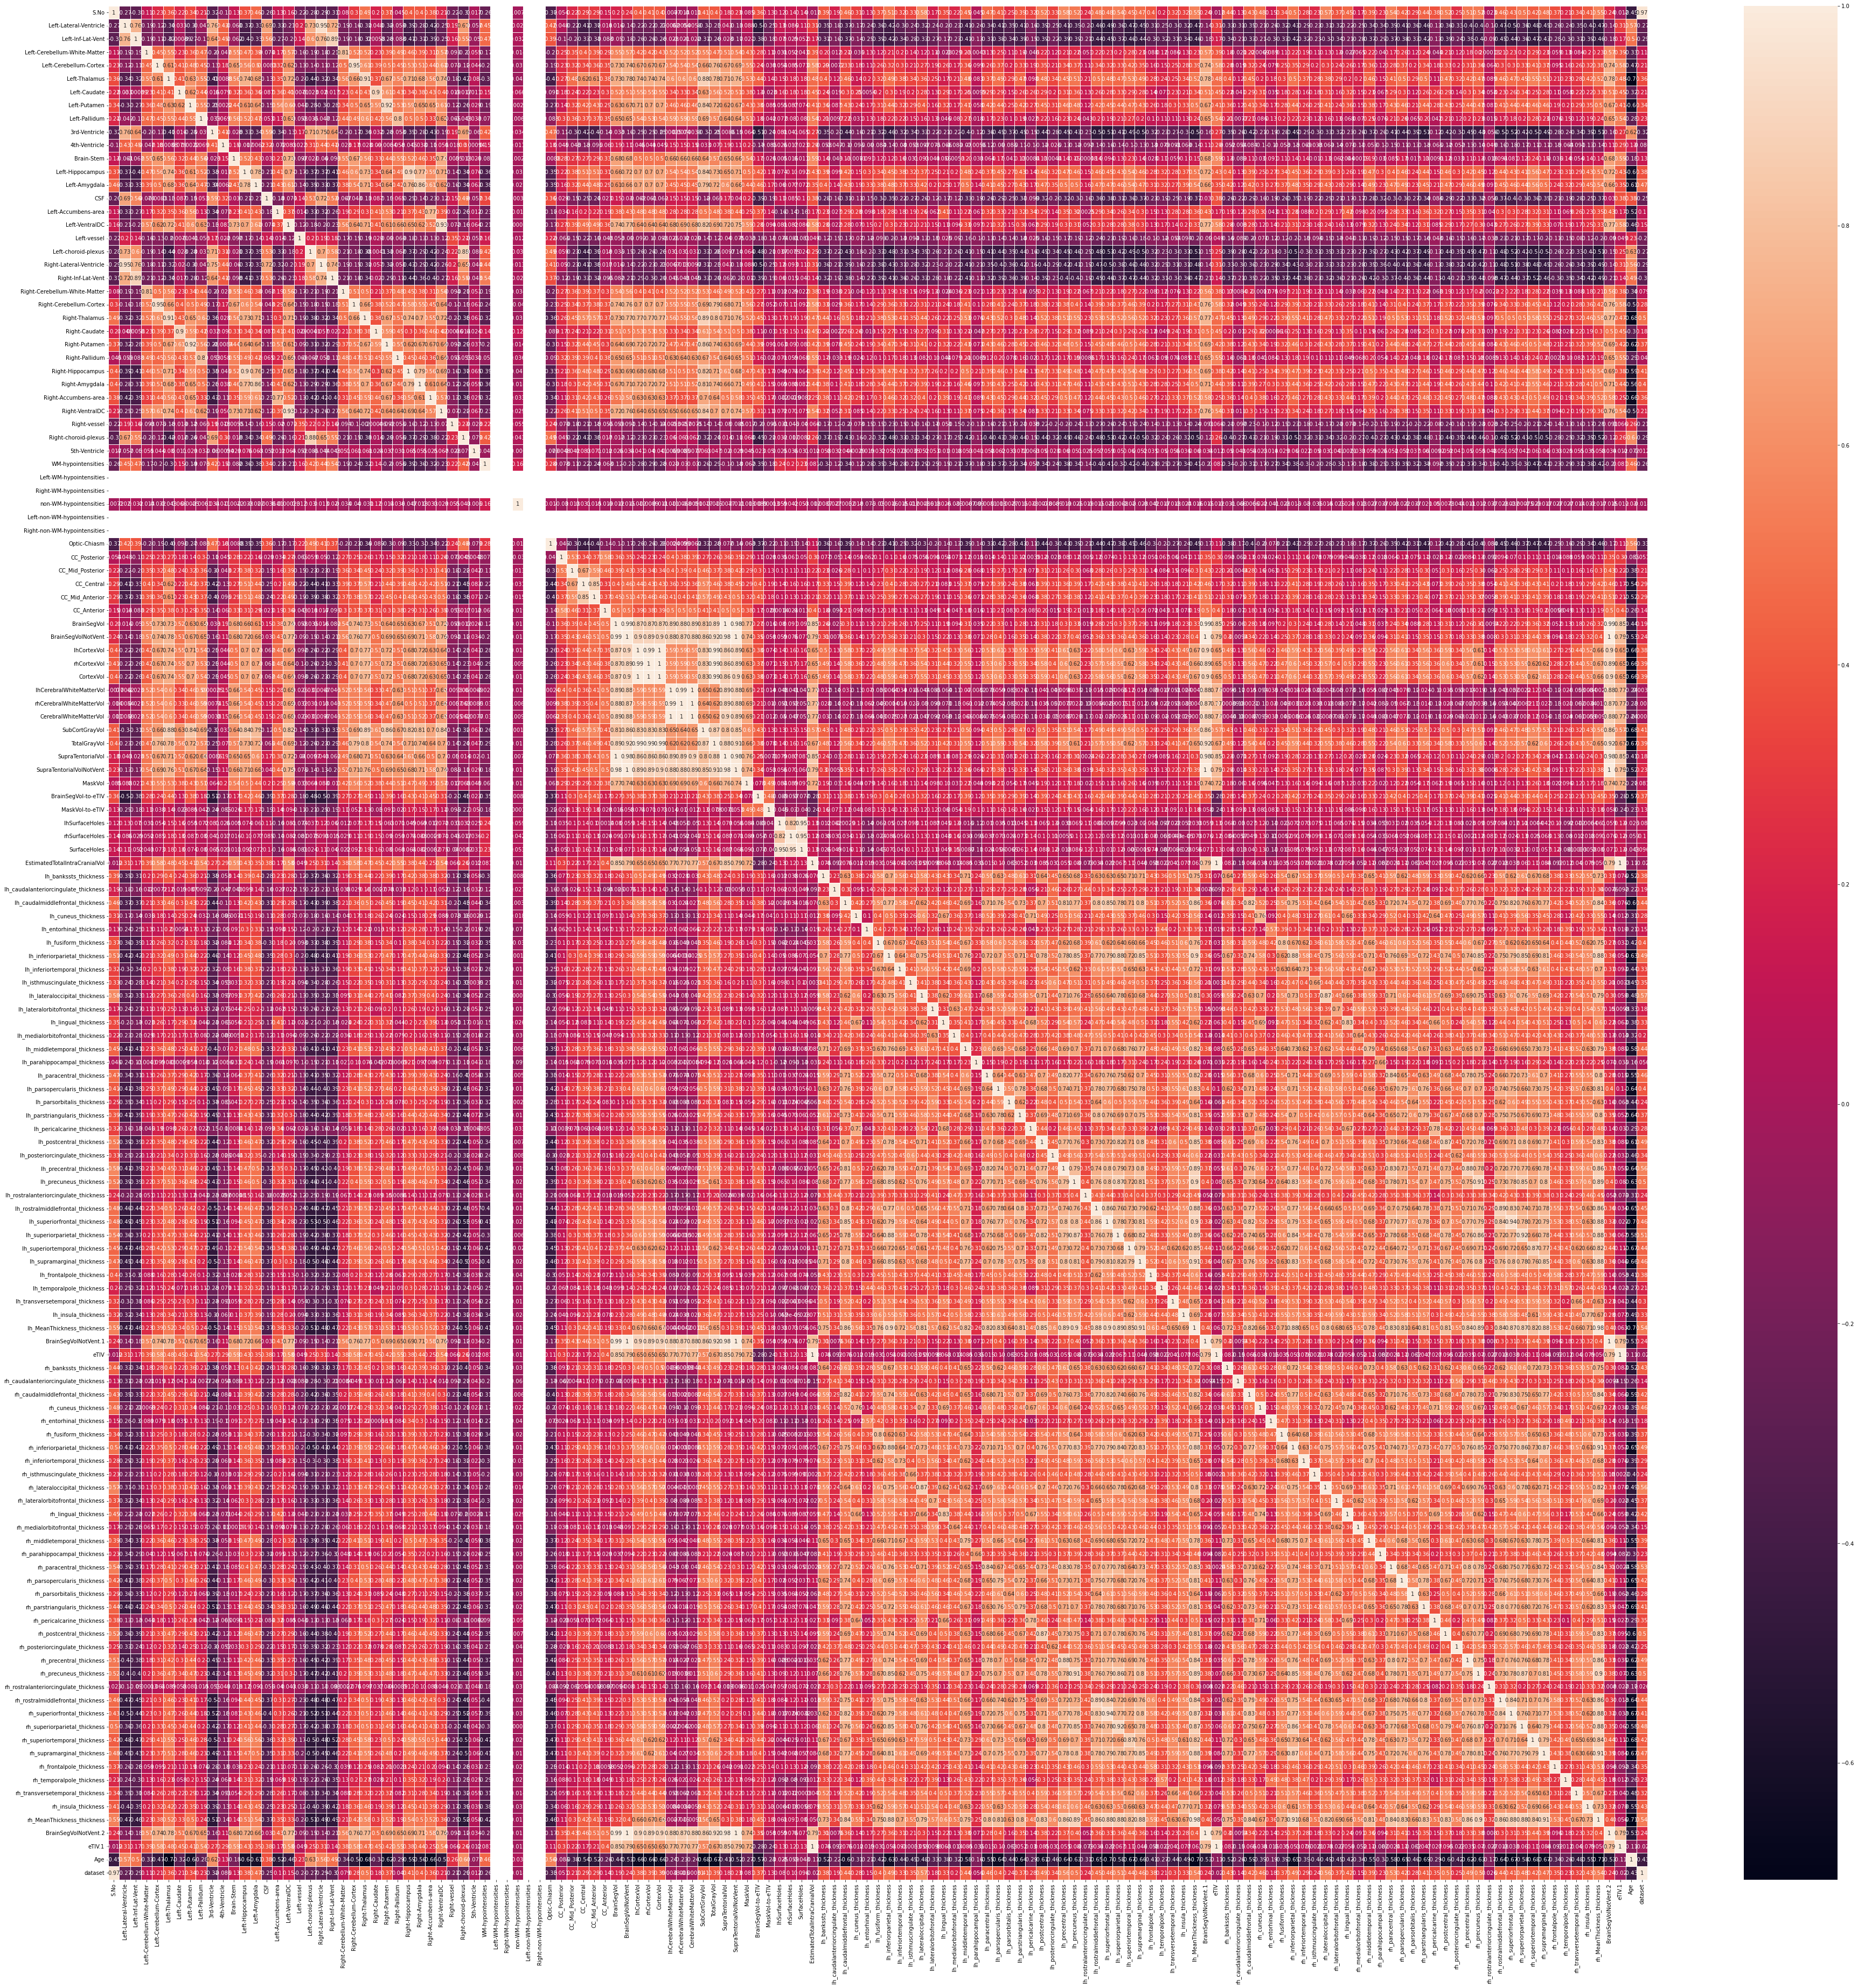

In [6]:
fig, axes = plt.subplots(figsize=(64, 64)) # Create 64 x 64 figure with axes
sns.heatmap(data=data.corr(), annot=True, linewidths=.5, ax=axes) # Configure to heat map to represent correlation
plt.show() # Print plot

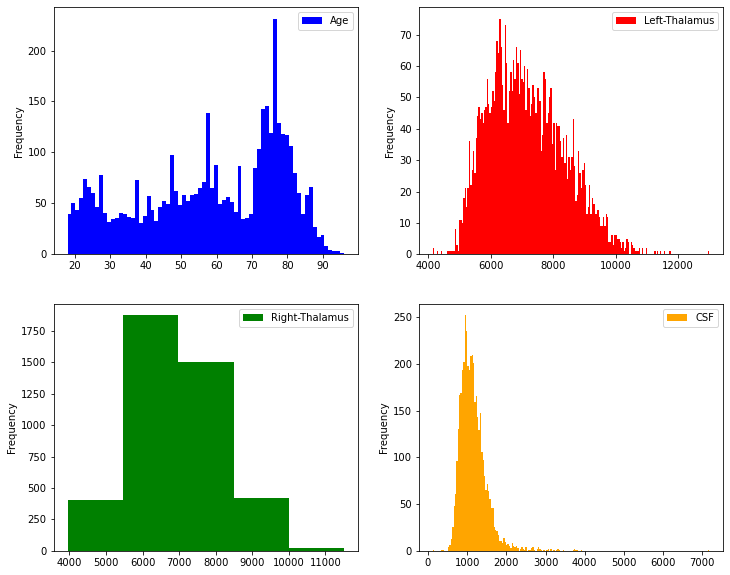

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10)) # Create 12 x 10 figure w 2 rows and 2 columns
data.plot(kind="hist", y="Age", bins=70, color="b", ax=axes[0][0]) # Create histogram of "age" predictor, set color blue, set axis
data.plot(kind="hist", y="Left-Thalamus", bins=200, color="r", ax=axes[0][1]) # Create histogram of "bmi" predictor, set color red, set axis
data.plot(kind="hist", y="Right-Thalamus", bins=5, color="g", ax=axes[1][0]) # Create histogram of "children" predictor, set color green, set axis
data.plot(kind="hist", y="CSF", bins=200, color="orange", ax=axes[1][1])
plt.show()

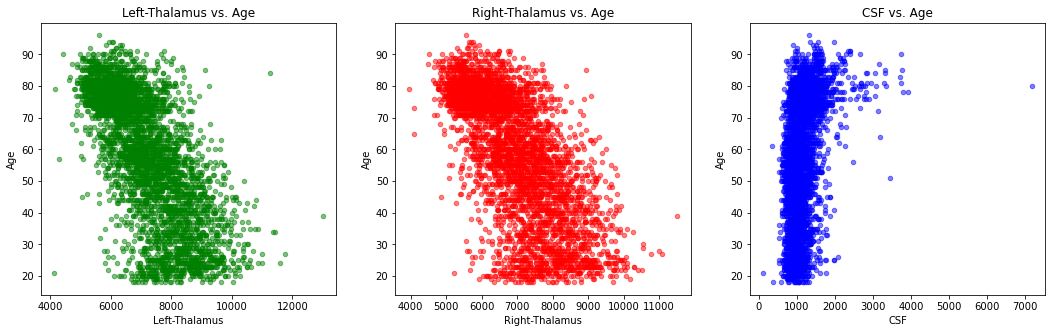

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5)) # Create figure with 3 columns for each chart
data.plot(kind='scatter', x='Left-Thalamus', y='Age', alpha=0.5, color='green', ax=axes[0], title="Left-Thalamus vs. Age") 
data.plot(kind='scatter', x='Right-Thalamus', y='Age', alpha=0.5, color='red', ax=axes[1], title="Right-Thalamus vs. Age") 
data.plot(kind='scatter', x='CSF', y='Age', alpha=0.5, color='blue', ax=axes[2], title="CSF vs. Age") 
plt.show()

In [9]:
#X = data.drop(["Age"], axis=1).values  # Drop Age column and store in X
#y = data["Age"].values # Store Age column values in y
y = data['Age'].values
X = data.values[:, 1:]

In [10]:
y.shape # Y (target) shape

(4226,)

In [11]:
X.shape # X (predictors) shape 

(4226, 140)

In [12]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle = True)

In [13]:
X2 = savgol_filter(x_test, 17, polyorder=2, deriv=2)

In [14]:
def optimise_pls_cv(X, y, n_comp):
    # Define PLS object
    pls = PLSRegression(n_components=n_comp)

    # Cross-validation
    y_cv = cross_val_predict(pls, X, y, cv=10)

    # Calculate scores
    r2 = r2_score(y, y_cv)
    mse = mean_squared_error(y, y_cv)
    rpd = y.std()/np.sqrt(mse)
    pls.fit(scale(X), y)
    rmse = np.sqrt(mean_squared_error(y, pls.predict(scale(X))))
    
    return (y_cv, r2, mse, rpd, rmse)

In [15]:
# test with 40 components
r2s = []
mses = []
rpds = []
rmses = []
xticks = np.arange(1, 41)
for n_comp in xticks:
    y_cv, r2, mse, rpd, rmse = optimise_pls_cv(X2, y_test, n_comp)
    r2s.append(r2)
    mses.append(mse)
    rpds.append(rpd)
    rmses.append(rmse)

In [16]:
# Plot the mses
def plot_metrics(vals, ylabel, objective):
    with plt.style.context('ggplot'):
        plt.plot(xticks, np.array(vals), '-v', color='blue', mfc='blue')
        if objective=='min':
            idx = np.argmin(vals)
        else:
            idx = np.argmax(vals)
        plt.plot(xticks[idx], np.array(vals)[idx], 'P', ms=10, mfc='red')

        plt.xlabel('Number of PLS components')
        plt.xticks = xticks
        plt.ylabel(ylabel)
        plt.title('PLS')

    plt.show()

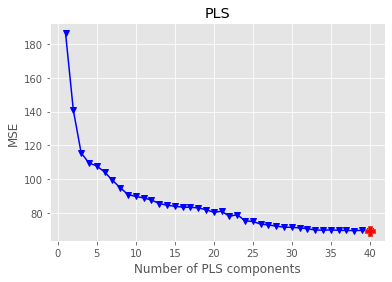

In [17]:
plot_metrics(mses, 'MSE', 'min')

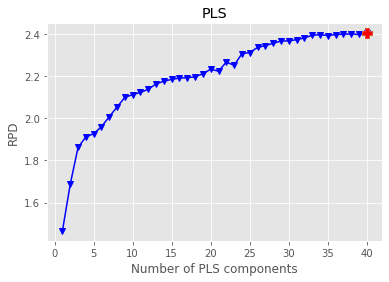

In [18]:
plot_metrics(rpds, 'RPD', 'max')

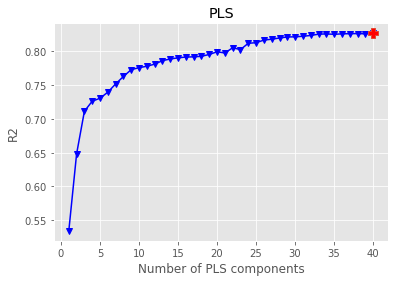

In [19]:
plot_metrics(r2s, 'R2', 'max')

In [20]:
y_cv, r2, mse, rpd, rmse = optimise_pls_cv(X2, y_test, 7)

In [21]:
print('R2: %0.4f, MSE: %0.4f, RPD: %0.4f, RMSE: %0.4f' %(r2, mse, rpd, rmse))

R2: 0.7519, MSE: 99.2942, RPD: 2.0074, RMSE: 9.3890


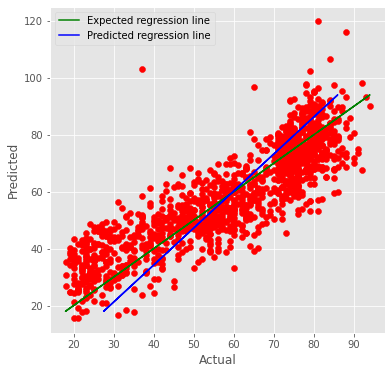

In [22]:
plt.figure(figsize=(6, 6))
with plt.style.context('ggplot'):
    plt.scatter(y_test, y_cv, color='red')
    plt.plot(y_test, y_test, '-g', label='Expected regression line')
    z = np.polyfit(y_test, y_cv, 1)
    plt.plot(np.polyval(z, y_test), y_test, color='blue', label='Predicted regression line')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.legend()
    plt.plot()

## SVM MODEL

In [23]:
from sklearn.svm import SVR

In [24]:
# split the data into inputs and outputs
X = data.drop(["Age"], axis=1).values  # Drop Age column and store in X
y = data["Age"].values # Store Age column values in y

In [25]:
svr = SVR().fit(x_train, y_train)

In [26]:
y_pred = svr.predict(x_test)

In [27]:
print("R-squared:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R-squared: 0.32167094749421854
RMSE: 16.475006363679224


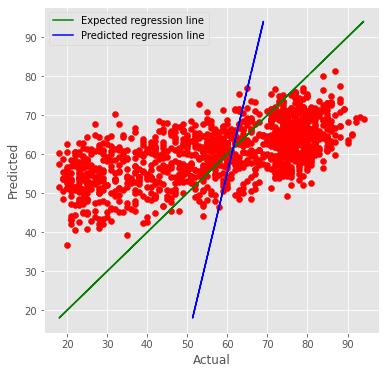

In [28]:
#plt.scatter(y_test, y_pred)
plt.figure(figsize=(6, 6))
with plt.style.context('ggplot'):
    plt.scatter(y_test, y_pred, color='red')
    plt.plot(y_test, y_test, '-g', label='Expected regression line')
    z = np.polyfit(y_test, y_pred, 1)
    plt.plot(np.polyval(z, y_test), y_test, color='blue', label='Predicted regression line')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.legend()
    plt.plot()

## RANDOM FOREST MODEL

In [29]:
X = data.drop(["Age"], axis=1).values  # Drop Age column and store in X
y = data["Age"].values # Store Age column values in y

In [30]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle = True)

In [31]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 50, random_state = 0)
regressor.fit(x_train, y_train)

RandomForestRegressor(n_estimators=50, random_state=0)

In [32]:
# Predicting a New Value 
y_pred = regressor.predict(x_test)

In [33]:
print("R-squared:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R-squared: 0.8771040095641939
RMSE: 7.012522035593509


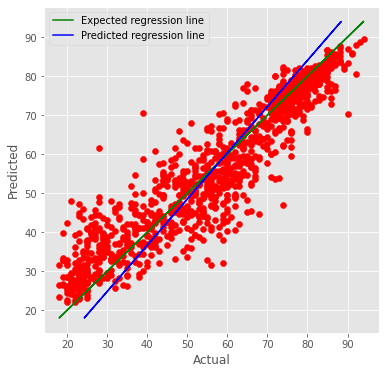

In [34]:
plt.figure(figsize=(6, 6))
with plt.style.context('ggplot'):
    plt.scatter(y_test, y_pred, color='red')
    plt.plot(y_test, y_test, '-g', label='Expected regression line')
    z = np.polyfit(y_test, y_pred, 1)
    plt.plot(np.polyval(z, y_test), y_test, color='blue', label='Predicted regression line')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.legend()
    plt.plot()